# Red Wine Quality Prediction Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


 IMPORTING DATASET

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
# checking the columns of dataset
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [6]:
# checking the types of columns
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
# checking the null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
# stastistical measures of the dataset 
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
df.skew()
# acceptalbe range is +/-0.5

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

VISUALIZATION

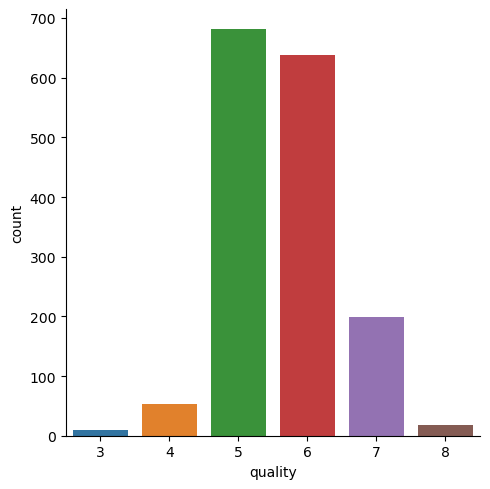

In [13]:
# number of values for each quality
sns.catplot(x='quality', data=df, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

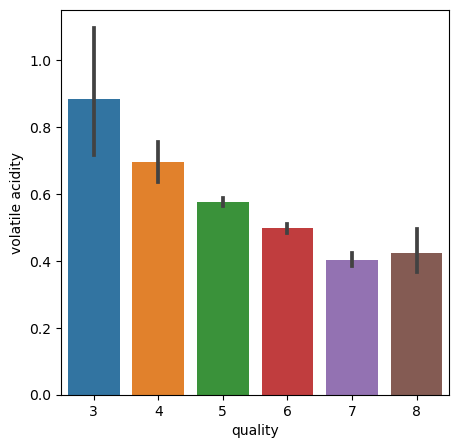

In [14]:
# volatile acidity vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=df)

<Axes: xlabel='quality', ylabel='citric acid'>

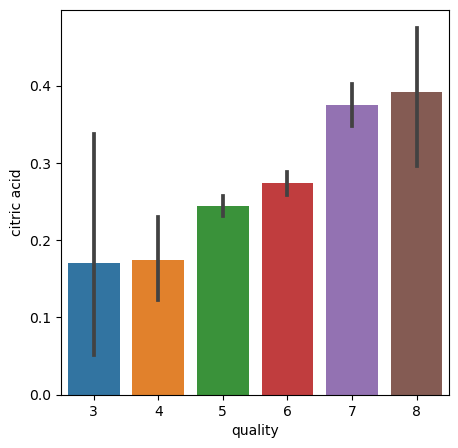

In [13]:
# citric acid vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=df)

<Axes: xlabel='quality', ylabel='residual sugar'>

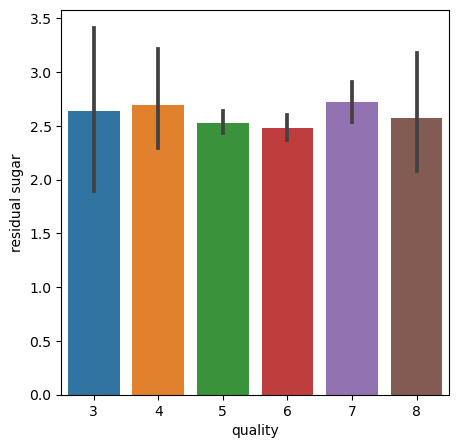

In [15]:
# residual sugar vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='residual sugar', data=df)

<Axes: xlabel='quality', ylabel='chlorides'>

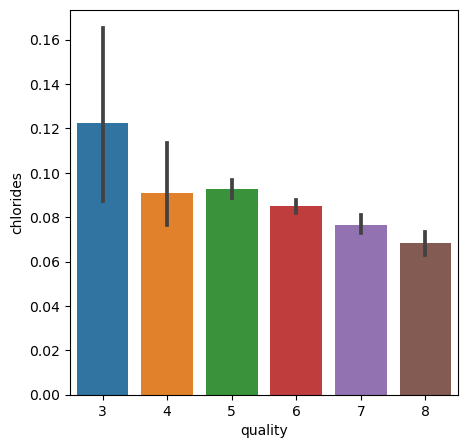

In [16]:
# chlorides vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='chlorides', data=df)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

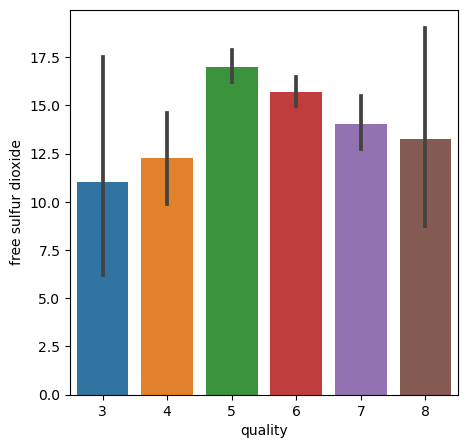

In [17]:
# free sulfur dioxide vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='free sulfur dioxide', data=df)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

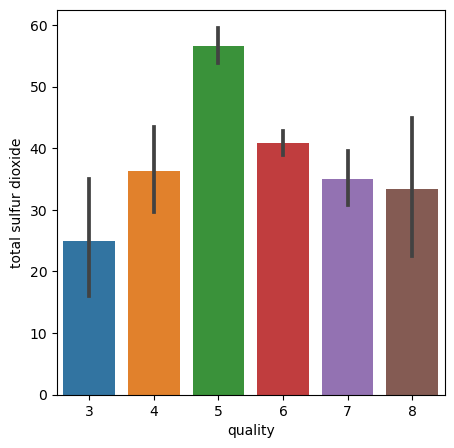

In [17]:
# total sulfur dioxide vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='total sulfur dioxide', data=df)

<Axes: xlabel='quality', ylabel='density'>

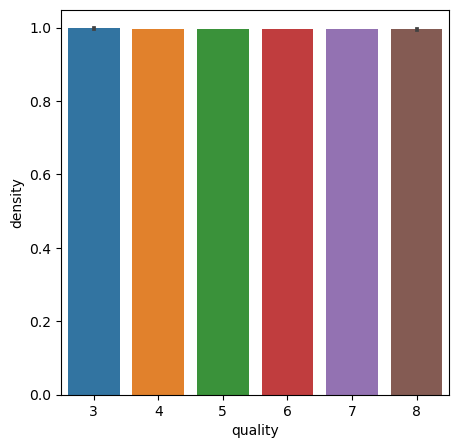

In [18]:
# density vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='density', data=df)

<Axes: xlabel='quality', ylabel='pH'>

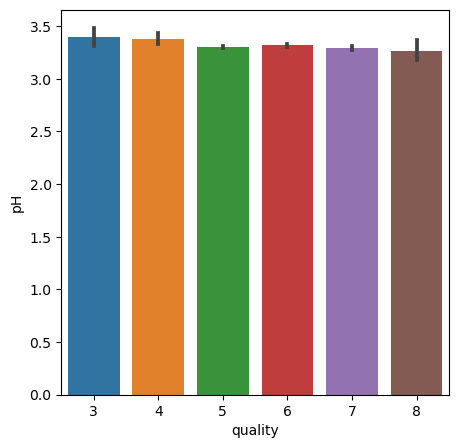

In [19]:
# pH vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='pH', data=df)

<Axes: xlabel='quality', ylabel='sulphates'>

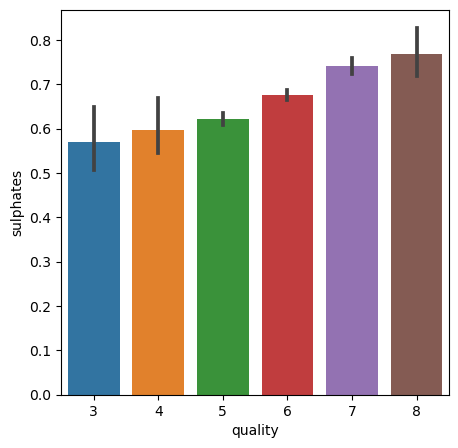

In [20]:
# sulphates vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='sulphates', data=df)

<Axes: xlabel='quality', ylabel='alcohol'>

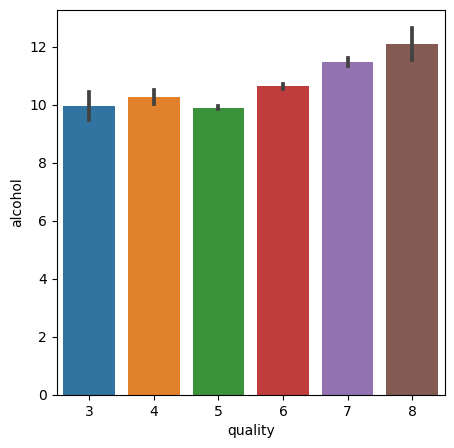

In [21]:
# alcohol vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='alcohol', data=df)

In [22]:
correlation=df.corr()

<Axes: >

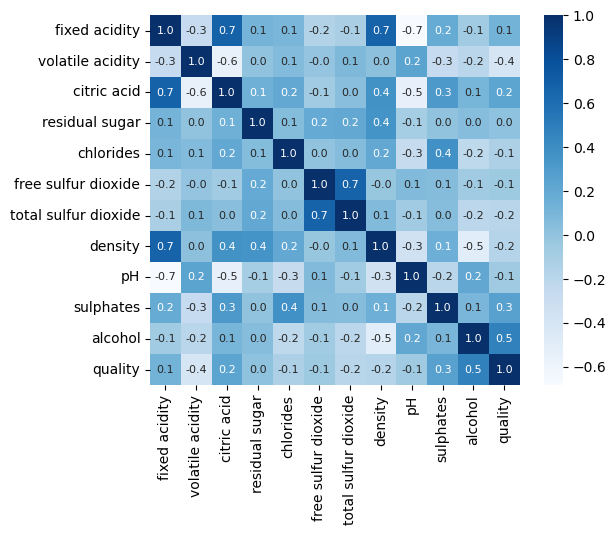

In [23]:
# constructing a heatmap to understand the correlation between the columns
plt.figure
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

DATA PREPROCESSING

In [24]:
# separate the data and lable
X=df.drop('quality', axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Lable Binarization

In [25]:
Y=df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Train & Test Split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


Model Traning:

In [27]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [28]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 87.5

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       275
           1       0.63      0.27      0.38        45

    accuracy                           0.88       320
   macro avg       0.76      0.62      0.65       320
weighted avg       0.85      0.88      0.85       320

Cross Validation Score: 86.99196708463951

Accuracy Score - Cross Validation Score is 0.5080329153604879


In [29]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 88.4375

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       275
           1       0.68      0.33      0.45        45

    accuracy                           0.88       320
   macro avg       0.79      0.65      0.69       320
weighted avg       0.87      0.88      0.87       320

Cross Validation Score: 86.0540752351097

Accuracy Score - Cross Validation Score is 2.383424764890293


In [30]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 88.125

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       275
           1       0.57      0.64      0.60        45

    accuracy                           0.88       320
   macro avg       0.75      0.78      0.77       320
weighted avg       0.89      0.88      0.88       320

Cross Validation Score: 80.29956896551724

Accuracy Score - Cross Validation Score is 7.825431034482762


In [31]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 93.4375

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       275
           1       0.82      0.69      0.75        45

    accuracy                           0.93       320
   macro avg       0.88      0.83      0.85       320
weighted avg       0.93      0.93      0.93       320

Cross Validation Score: 86.99235893416927

Accuracy Score - Cross Validation Score is 6.445141065830725


In [32]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 86.5625

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       275
           1       0.62      0.11      0.19        45

    accuracy                           0.87       320
   macro avg       0.75      0.55      0.56       320
weighted avg       0.84      0.87      0.82       320

Cross Validation Score: 86.24118338557993

Accuracy Score - Cross Validation Score is 0.32131661442006987


In [33]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 92.5

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       275
           1       0.84      0.58      0.68        45

    accuracy                           0.93       320
   macro avg       0.89      0.78      0.82       320
weighted avg       0.92      0.93      0.92       320

Cross Validation Score: 87.18005485893417

Accuracy Score - Cross Validation Score is 5.31994514106583


In [34]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 87.5


AUC ROC Curve 

In [35]:
from sklearn.metrics import plot_roc_curve

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\rakhi\coding folders\Lib\site-packages\sklearn\metrics\__init__.py)

In [36]:
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

Building a Predictive System

In [41]:
input_data = (7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the lable for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

[1]
Good Quality Wine
